In [5]:
import os
import difflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')
from rllte.evaluation.visualization import _annotate_and_decorate_axis, plot_interval_estimates
from rllte.evaluation import Performance

# Effectiveness Analysis

## 1. Mario + Baseline

### Curves

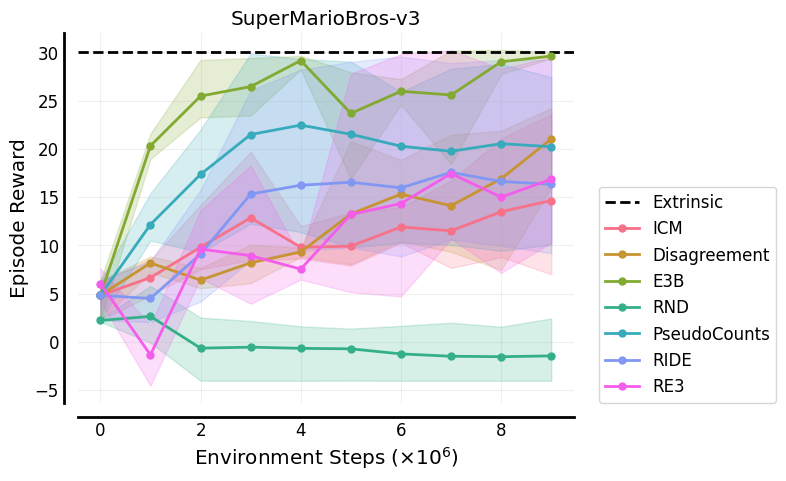

In [6]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
colors = sns.color_palette("husl", len(algos))

root = "/home/roger/Desktop/rllte/all_mario_runs/baseline"
num_points = 10
all_data = {algo: [] for algo in algos}
for algo in algos:
    for dir in os.listdir(root):
        if algo.lower() in dir:
            file = f"{root}/{dir}/"
            # print(os.listdir(file), file)
            file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
            data = pd.read_csv(file)['episode_reward']
            data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
            all_data[algo].append(data)

    all_data[algo] = np.array(all_data[algo])
    all_data[algo] = np.expand_dims(all_data[algo], axis=1)

sampling_dict = dict()
for algo in algos:
    sampling_dict[algo] = [[], [], []]
    for frame in range(num_points):
        perf = Performance(all_data[algo][:, :, frame], get_ci=True, reps=2000)
        value, CIs = perf.aggregate_iqm()
        sampling_dict[algo][0].append(value)
        sampling_dict[algo][1].append(CIs[0]) # lower bound
        sampling_dict[algo][2].append(CIs[1]) # upper bound

    sampling_dict[algo][0] = np.array(sampling_dict[algo][0]).reshape(-1)
    sampling_dict[algo][1] = np.array(sampling_dict[algo][1]).reshape(-1)
    sampling_dict[algo][2] = np.array(sampling_dict[algo][2]).reshape(-1)

fig, ax = plt.subplots()

ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
for algo, color in zip(algos, colors):
    mean, ci_high, ci_low = sampling_dict[algo]
    ax.plot(mean, linewidth=2, marker='o', markersize=5, c=color, label=algo)
    ax.fill_between(range(num_points), ci_high, ci_low, alpha=0.2, color=color)

ax.set_title('SuperMarioBros-v3', fontsize="x-large")
ax = _annotate_and_decorate_axis(ax, 
                                 ticklabelsize="large",
                                 xlabel=r"Environment Steps ($\times 10^6$)", 
                                 ylabel="Episode Reward",
                                 xticklabels=np.linspace(0, 1, num_points),
                                 )
# ax.legend(loc='upper left', fontsize='large')
ax.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0, fontsize='large')

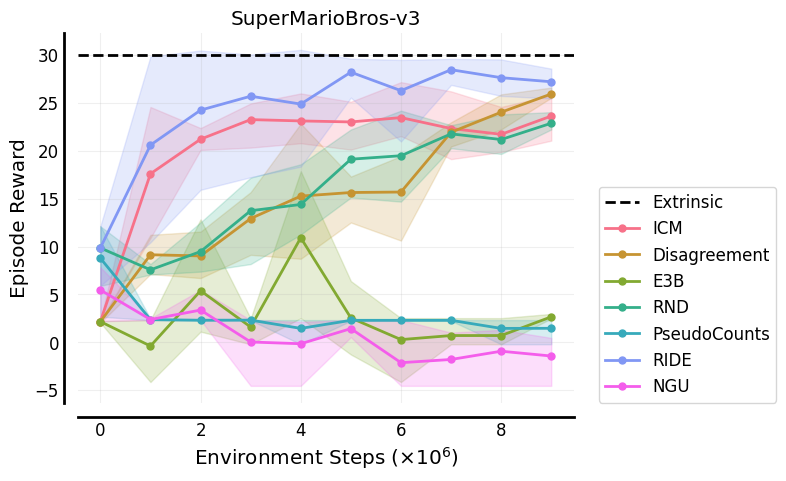

In [7]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'NGU', 'RE3',]
colors = sns.color_palette("husl", len(algos))

root = "/home/roger/Desktop/rllte/all_mario_runs/rew. vanilla"
num_points = 10
all_data = {algo: [] for algo in algos}
for algo in algos:
    for dir in os.listdir(root):
        if algo.lower() in dir:
            file = f"{root}/{dir}/"
            file = file + '/' + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
            data = pd.read_csv(file)['episode_reward']
            data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
            all_data[algo].append(data)

    all_data[algo] = np.array(all_data[algo])
    all_data[algo] = np.expand_dims(all_data[algo], axis=1)

sampling_dict = dict()
for algo in algos:
    sampling_dict[algo] = [[], [], []]
    for frame in range(num_points):
        perf = Performance(all_data[algo][:, :, frame], get_ci=True, reps=2000)
        value, CIs = perf.aggregate_iqm()
        sampling_dict[algo][0].append(value)
        sampling_dict[algo][1].append(CIs[0]) # lower bound
        sampling_dict[algo][2].append(CIs[1]) # upper bound

    sampling_dict[algo][0] = np.array(sampling_dict[algo][0]).reshape(-1)
    sampling_dict[algo][1] = np.array(sampling_dict[algo][1]).reshape(-1)
    sampling_dict[algo][2] = np.array(sampling_dict[algo][2]).reshape(-1)

fig, ax = plt.subplots()

ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
for algo, color in zip(algos, colors):
    mean, ci_high, ci_low = sampling_dict[algo]
    ax.plot(mean, linewidth=2, marker='o', markersize=5, c=color, label=algo)
    ax.fill_between(range(num_points), ci_high, ci_low, alpha=0.2, color=color)

ax.set_title('SuperMarioBros-v3', fontsize="x-large")
ax = _annotate_and_decorate_axis(ax, 
                                 ticklabelsize="large",
                                 xlabel=r"Environment Steps ($\times 10^6$)", 
                                 ylabel="Episode Reward",
                                 xticklabels=np.linspace(0, 1, num_points),
                                 )
# ax.legend(loc='upper left', fontsize='large')
ax.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0, fontsize='large')

### Bar

/home/roger/Desktop/rllte/all_mario_runs//weight init: default/PPO_SuperMarioBros-1-1-v3_disagreement_obsRMS:True_rewNorm:none_updateProp:1.0_rff:False_s1//2024-02-21-04-45-47/train.log
/home/roger/Desktop/rllte/all_mario_runs//obs. norm./PPO_SuperMarioBros-1-1-v3_re3_obsRMS:True_rewNorm:rms_updateProp:1.0_rff:False_s1//2024-02-13-07-43-46/train.log


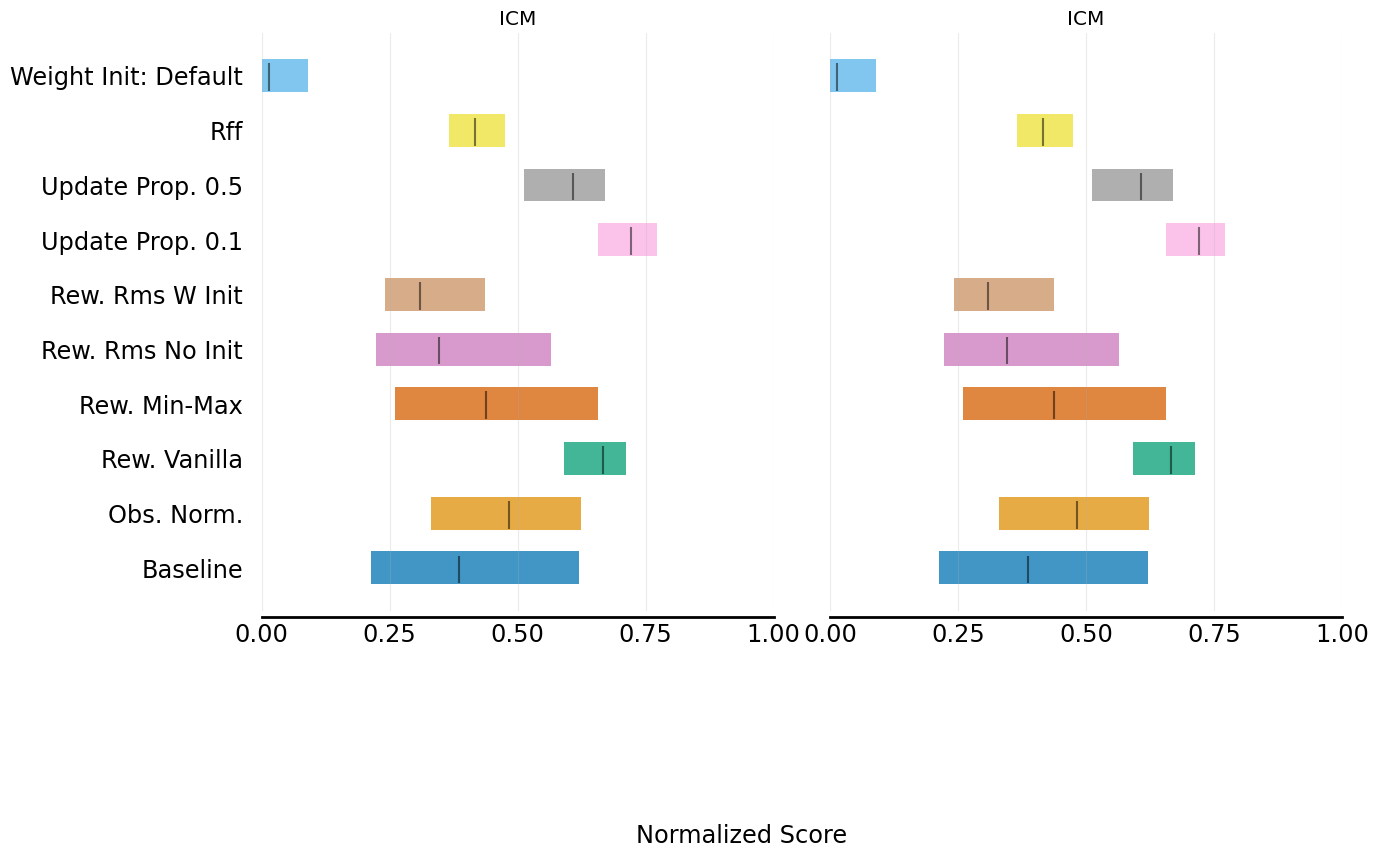

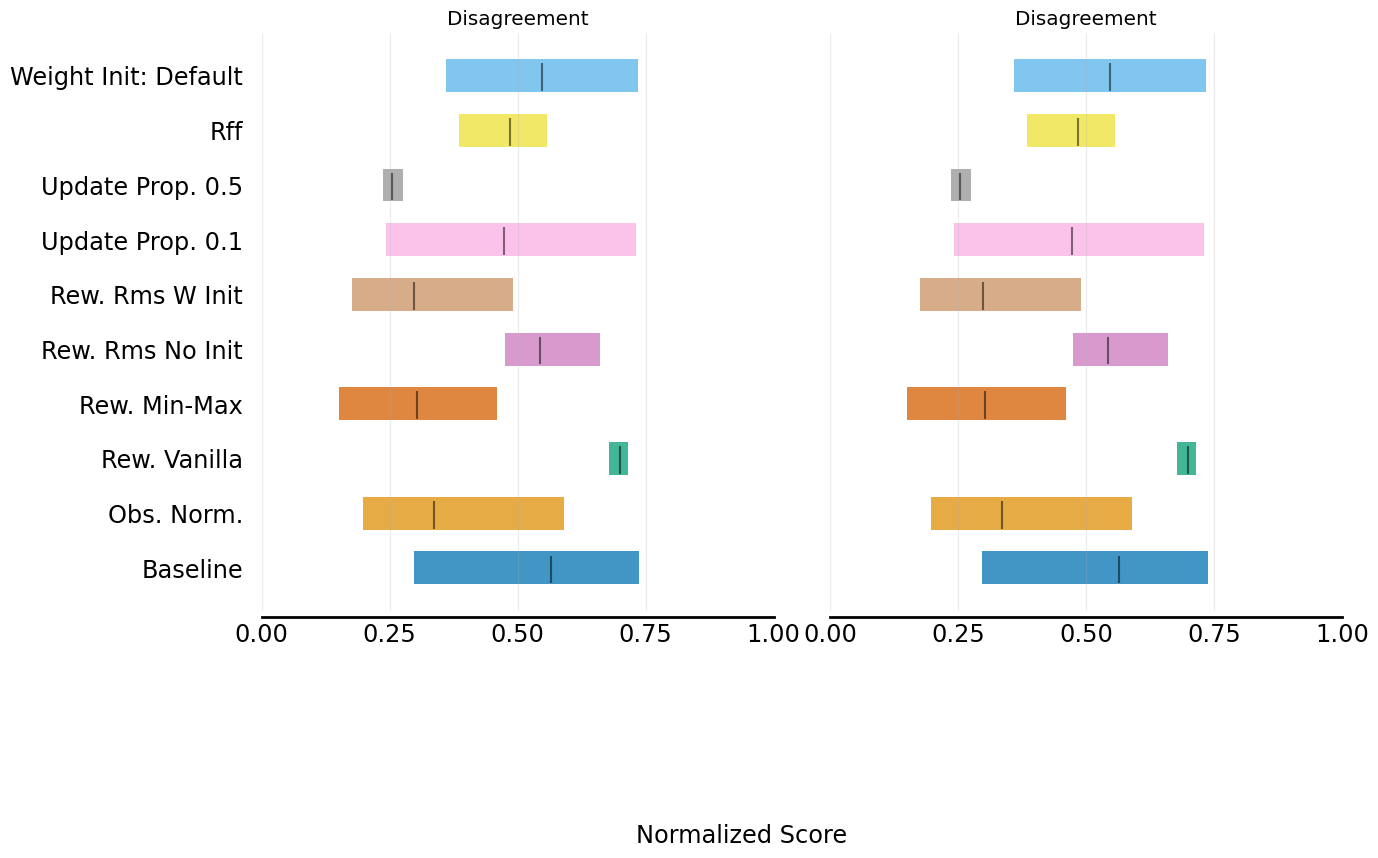

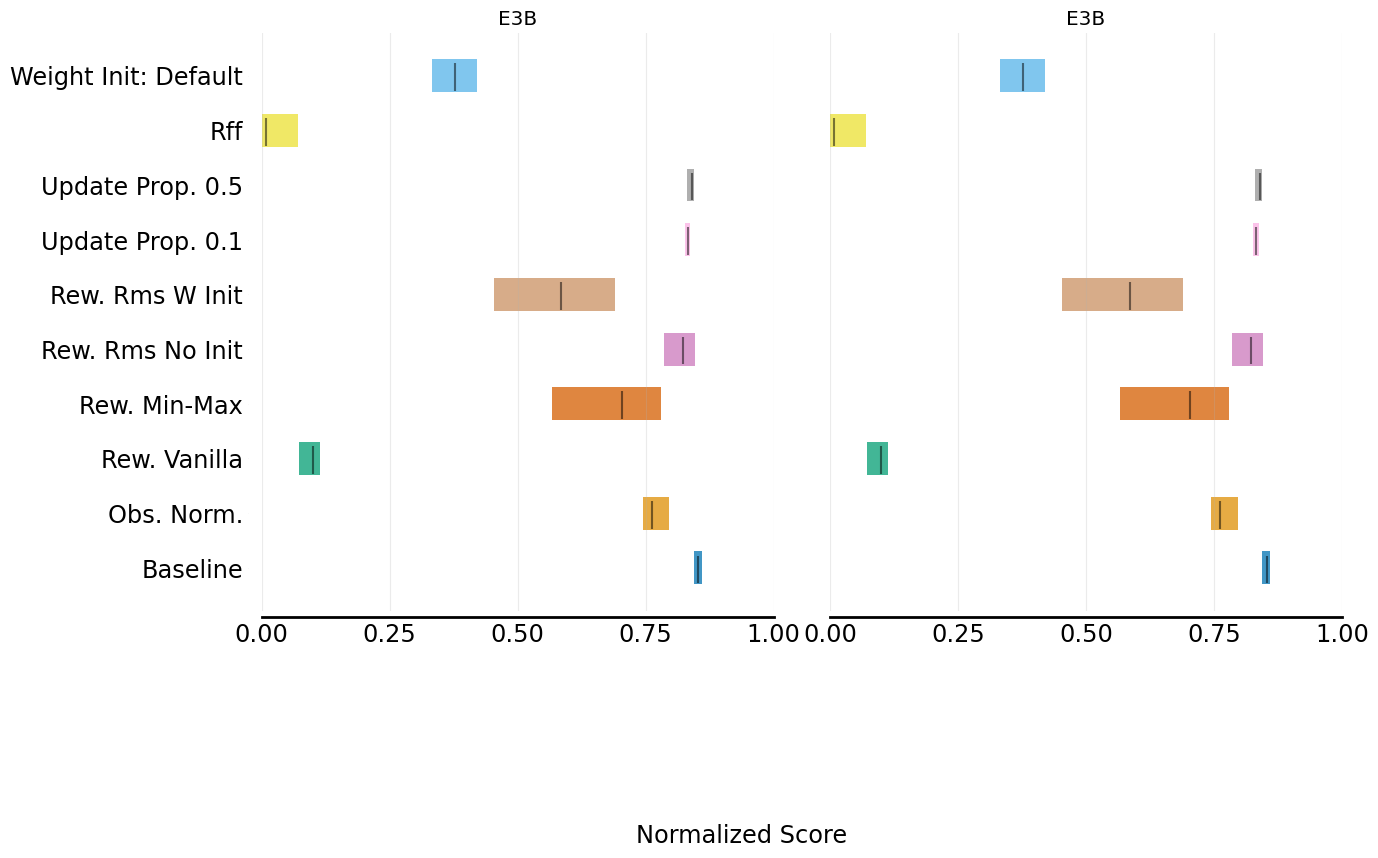

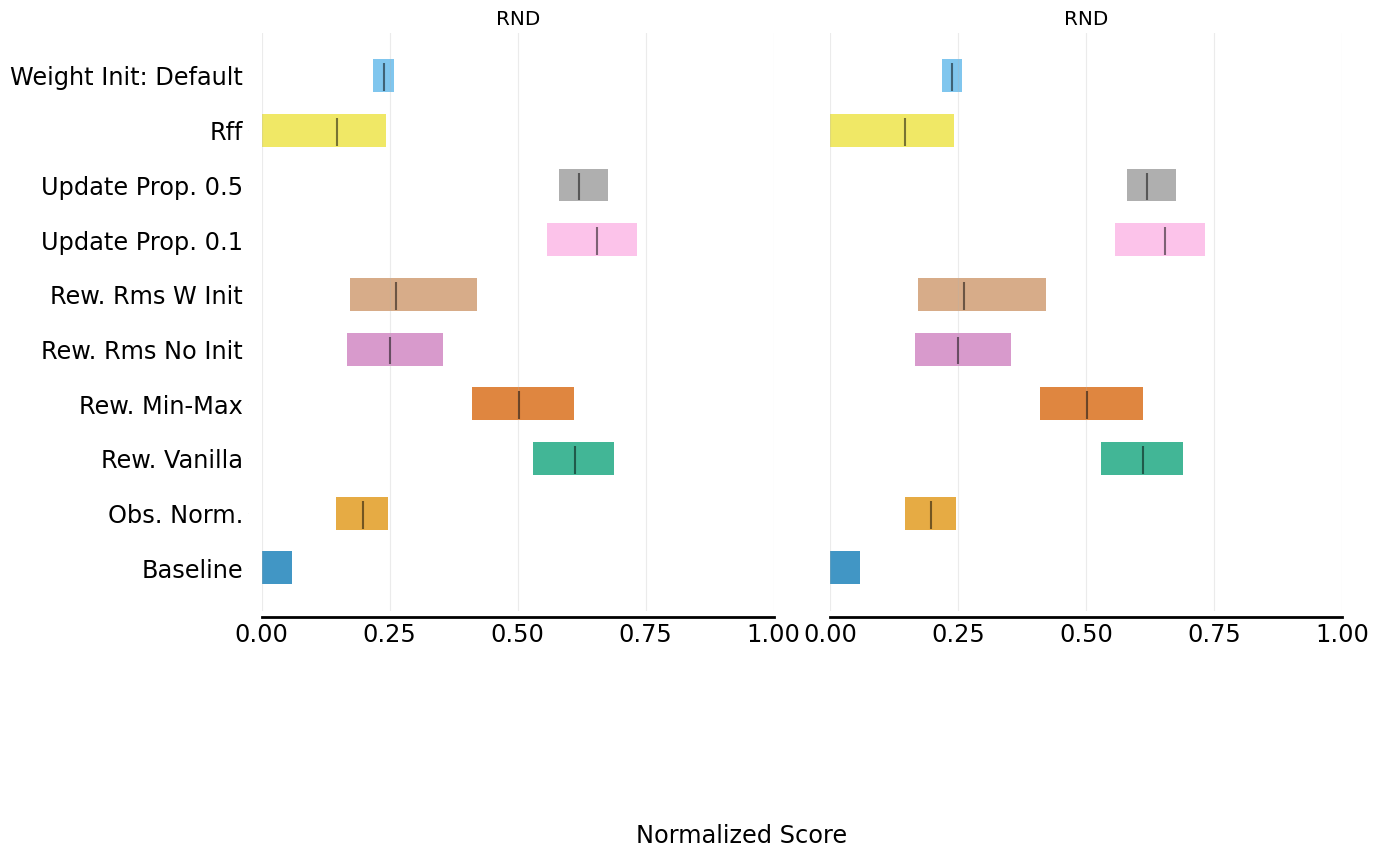

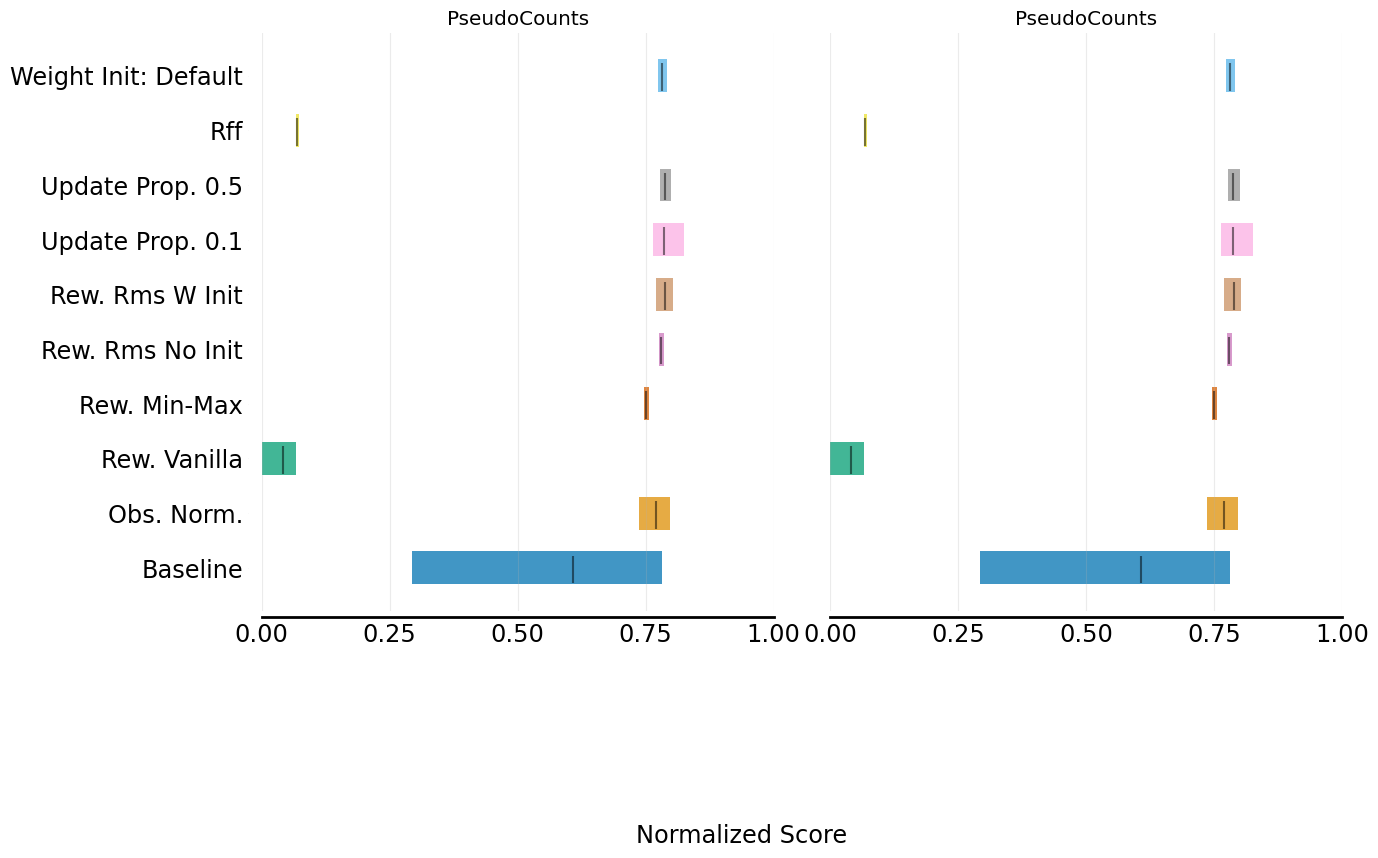

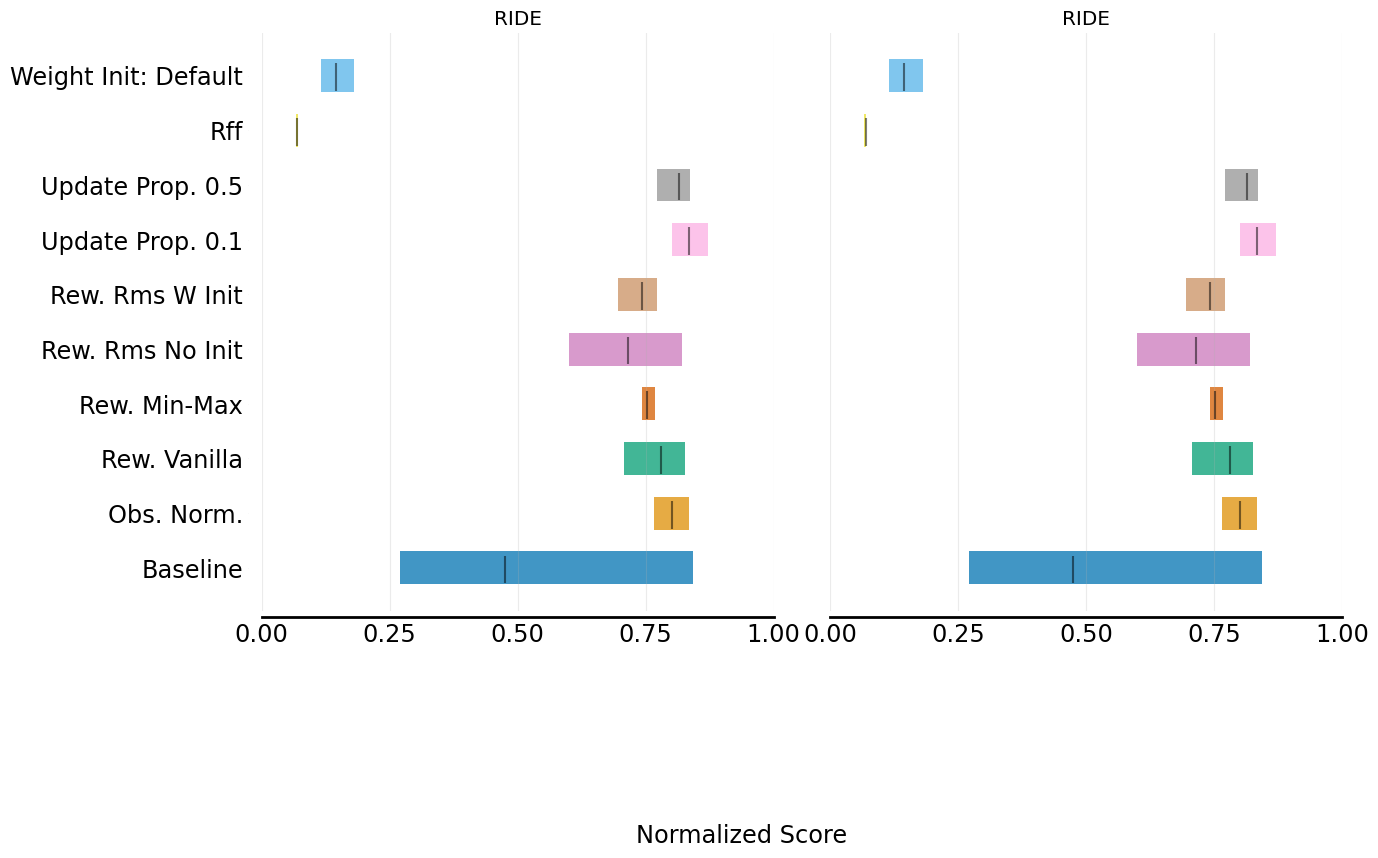

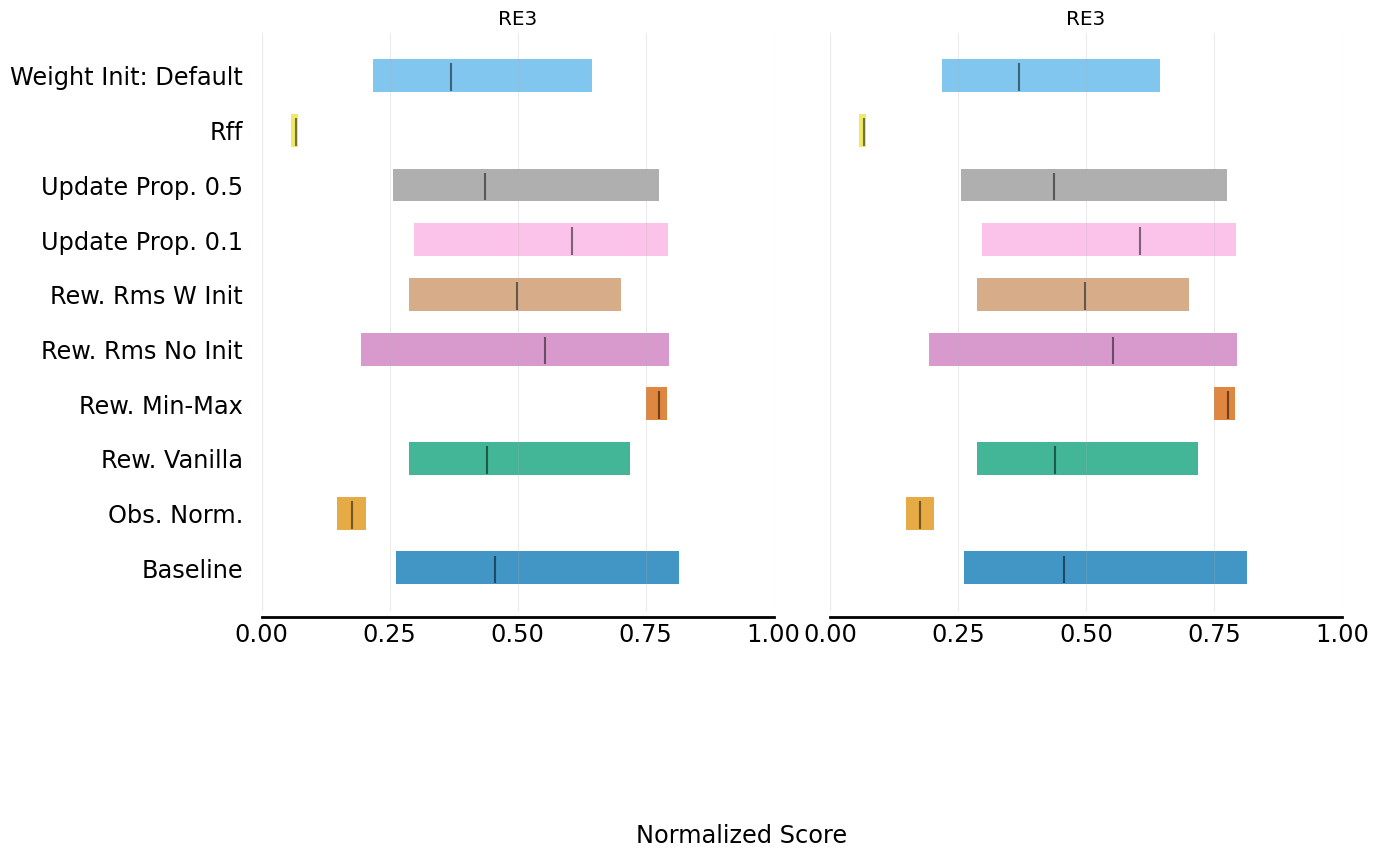

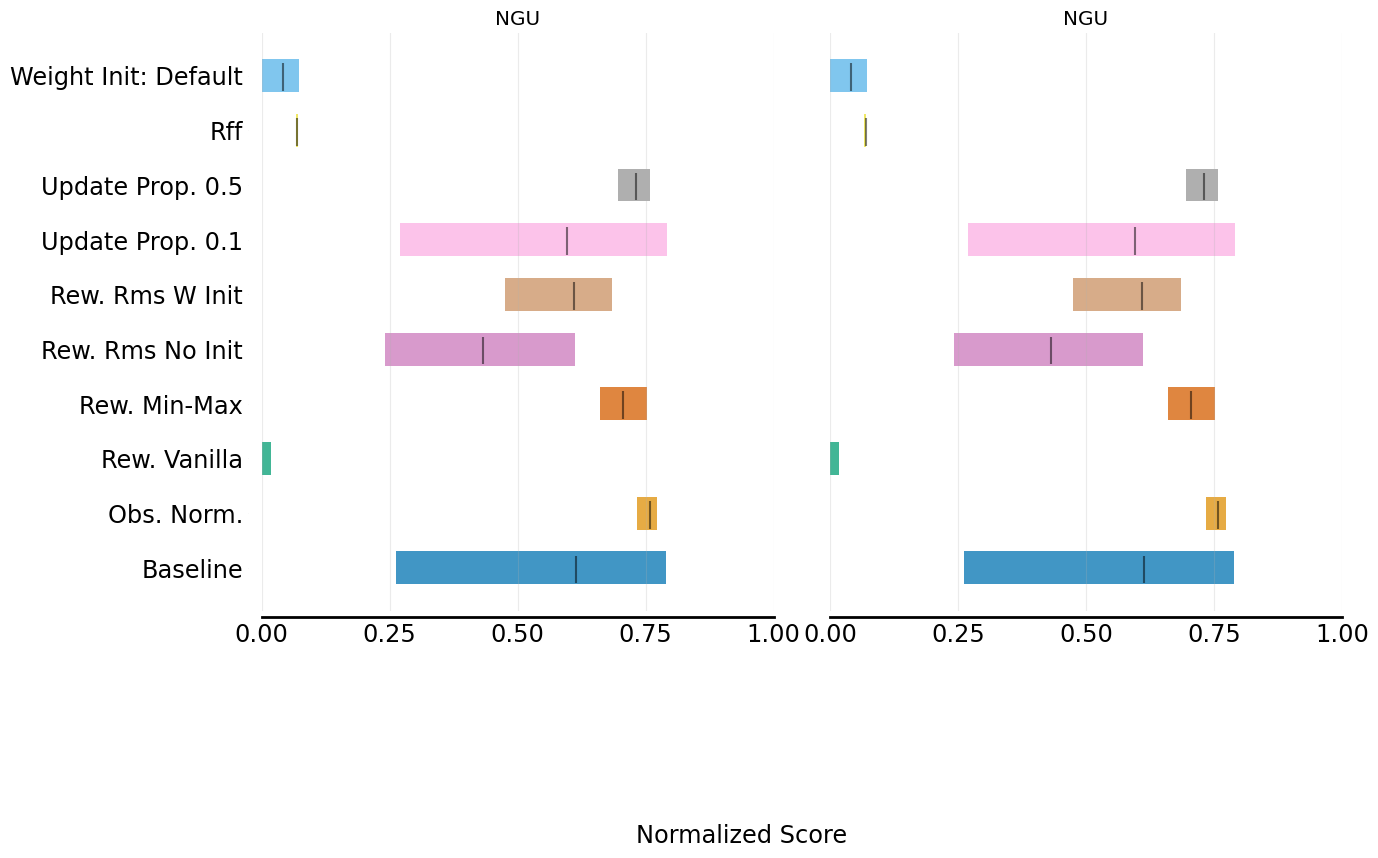

In [9]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
for algo in algos:
    num_last_episodes = 30
    max_episode_return = 35
    root = "/home/roger/Desktop/rllte/all_mario_runs/"
    types = ['Baseline', 'Obs. Norm.', 'Rew. Vanilla', 'Rew. Min-Max', 'Rew. Rms No Init', 'Rew. Rms W Init', 'Update Prop. 0.1', 'Update Prop. 0.5', 'Rff', 'Weight Init: Default']
    colors = sns.color_palette("husl", len(types))
    all_data = {type: [] for type in types}

    for type in types:
        for dir in os.listdir(root + type.lower()):
            if algo.lower() in dir:
                file = f"{root}/{type.lower()}/{dir}/"
                file = file + '/' + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                try:
                    data = pd.read_csv(file)['episode_reward']
                except:
                    print(file)
                    continue
                data = data[-num_last_episodes:]
                all_data[type].append(data)

        all_data[type] = np.array(all_data[type]).mean(axis=1, keepdims=True) / max_episode_return

    aggregate_performance_dict = {
        "MEAN": {},
        #"MEDIAN": {},
        "IQM": {},
        #"OG": {}
    }
    for type in all_data.keys():
        perf = Performance(scores=all_data[type], get_ci=True)
        aggregate_performance_dict['MEAN'][type] = perf.aggregate_mean()
        #aggregate_performance_dict['MEDIAN'][type] = perf.aggregate_median()
        aggregate_performance_dict['IQM'][type] = perf.aggregate_iqm()
        #aggregate_performance_dict['OG'][type] = perf.aggregate_og()

    fig, axes = plot_interval_estimates(aggregate_performance_dict, 
                                    metric_names=['MEAN', 'IQM'], #'MEDIAN', 'IQM', 'OG'], 
                                    algorithms=types, 
                                    xlabel="Normalized Score",
                                    subfigure_width=6,
                                    xlabel_y_coordinate=-0.2,
                                    row_height=0.75)
    
    # set 1 single title to algo
    for ax in axes:
        ax.set_title(algo, fontsize="x-large")

    for ax in axes:
        ax.set_xlim([0, 1])
        
    # for ax in axes:
        # ax.axhline(y=0.5, color='k', linestyle='--', linewidth=2)
        # ax.axhline(y=1.5, color='k', linestyle='--', linewidth=2)
        # ax.axhline(y=3.5, color='k', linestyle='--', linewidth=2)
        # ax.axhline(y=4.5, color='k', linestyle='--', linewidth=2)
        # ax.axhline(y=5.5, color='k', linestyle='--', linewidth=2)
        # ax.axhline(y=6.5, color='k', linestyle='--', linewidth=2)